In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('Data Challenge Numbers - Winter 2018 - Sheet1.csv')

In [20]:
df.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

What to submit: Which metric you would report for this dataset, and its value in dollars.

This value can be considered incorrect because the average value is taken from the total price of a sale regardless of the number of items. To obtain a more understandable value you would divide the "order_amount" by the value "total_items", which yields an average cost per item of $387.74. However this value also doesn't truly capture the idea of AOV, since the average order value should technically be the cost of an average "order" and not just an "item". The average cost of an item that is calculated above is more accurately representative of the average cost of a shoe model weighted by how frequently it is bought. 

To gain a better understanding of an average order, it might be useful to remove the outlier orders. After plotting the number of items per order and some simple filtering, I found that there were 17 orders of 2000 items which heavily skewed the average cost per order. After removing these outlier values I found the AOV was $754.09 which is a much more sensible value. 

In [4]:
print(np.mean(df['order_amount']))

3145.128


In [7]:
print(np.mean(df['order_amount'] / df['total_items']))

387.7428


In [24]:
df_mat = df.as_matrix()

In [31]:
df[df['shop_id'] == 50]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
90,91,50,744,193,1,debit,2017-03-02 6:36:55
175,176,50,792,193,1,credit_card,2017-03-20 13:51:00
289,290,50,803,386,2,debit,2017-03-30 5:45:50
444,445,50,787,193,1,debit,2017-03-21 10:26:47
527,528,50,940,579,3,debit,2017-03-26 5:17:28
558,559,50,755,579,3,debit,2017-03-07 22:45:06
560,561,50,762,386,2,credit_card,2017-03-18 10:22:49
633,634,50,721,579,3,debit,2017-03-08 11:19:13
729,730,50,942,193,1,cash,2017-03-05 15:15:27
737,738,50,873,772,4,debit,2017-03-02 21:26:04


In [33]:
orders = df['total_items'].as_matrix()

In [34]:
orders

array([2, 1, 1, ..., 3, 2, 2])

(array([ 4983.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,    17.]),
 array([  1.00000000e+00,   4.09800000e+01,   8.09600000e+01,
          1.20940000e+02,   1.60920000e+02,   2.00900000e+02,
          2.40880000e+02,   2.80860000e+02,   3.20840000e+02,
          3.60820000e+02,   4.00800000e+02,   4.40780000e+02,
          4.80760000e+02,   5.20740000e+02,   5.60720000e+02,
          6.00700000e+02,   6.40680000e+02,   6.80660000e+02,
          7.20640000e+02,   7.60620000e+02,   8.00600000e+02,
          8.40580000e+02,   8.80560000e+02,   9.20540000e+02,
          9.60520000e+02,   1.00050000e+03,   

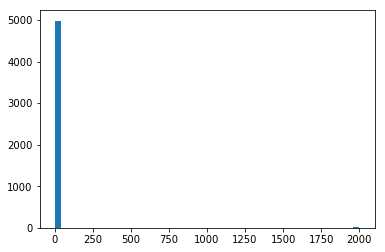

In [36]:
plt.hist(orders, 50)

In [37]:
df[df['total_items'] < 250]['order_amount'].mean()

754.0919125025085

In [38]:
df[df['total_items'] == 2000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
